In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('songs_normalize.csv')
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


# Nuage de mots Artiste

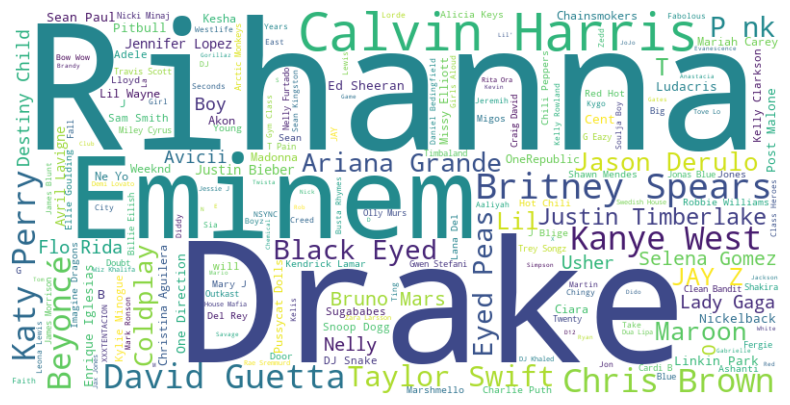

In [111]:
from wordcloud import WordCloud

text = " ".join(df["artist"])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Répartition de la popularité des chansons 

Text(0.5, 0, 'Popularité')

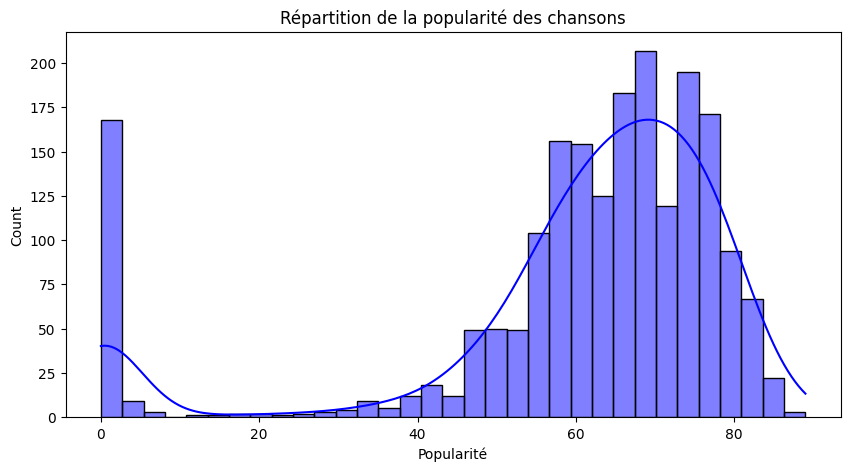

In [112]:
plt.figure(figsize=(10, 5))
sns.histplot(df['popularity'], kde=True, color='blue')
plt.title('Répartition de la popularité des chansons')
plt.xlabel('Popularité')


# Évolution de la popularité moyenne par année 

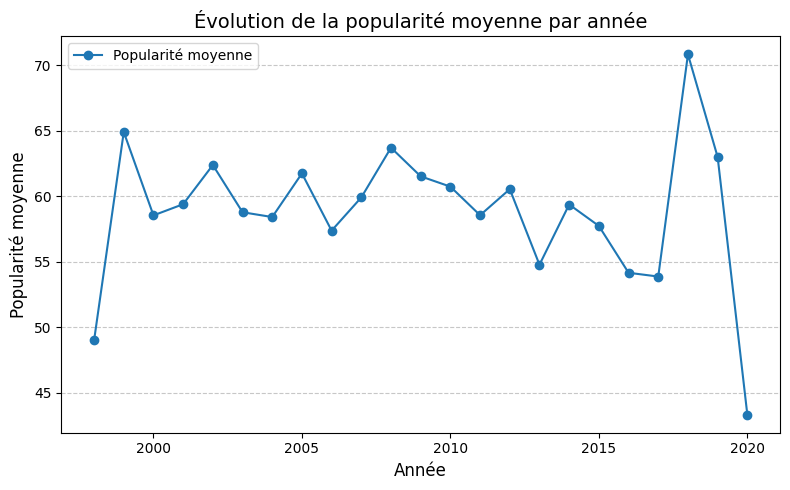

In [113]:
# Calcul de la popularité moyenne par année
popularity_per_year = df.groupby("year")["popularity"].mean()

# Tracé de l'évolution
plt.figure(figsize=(8, 5))
plt.plot(popularity_per_year.index, popularity_per_year.values, marker='o', label="Popularité moyenne")

# Personnalisation du graphique
plt.title("Évolution de la popularité moyenne par année", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Popularité moyenne", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Corrélation des Caractéristiques Audio : Heatmap 

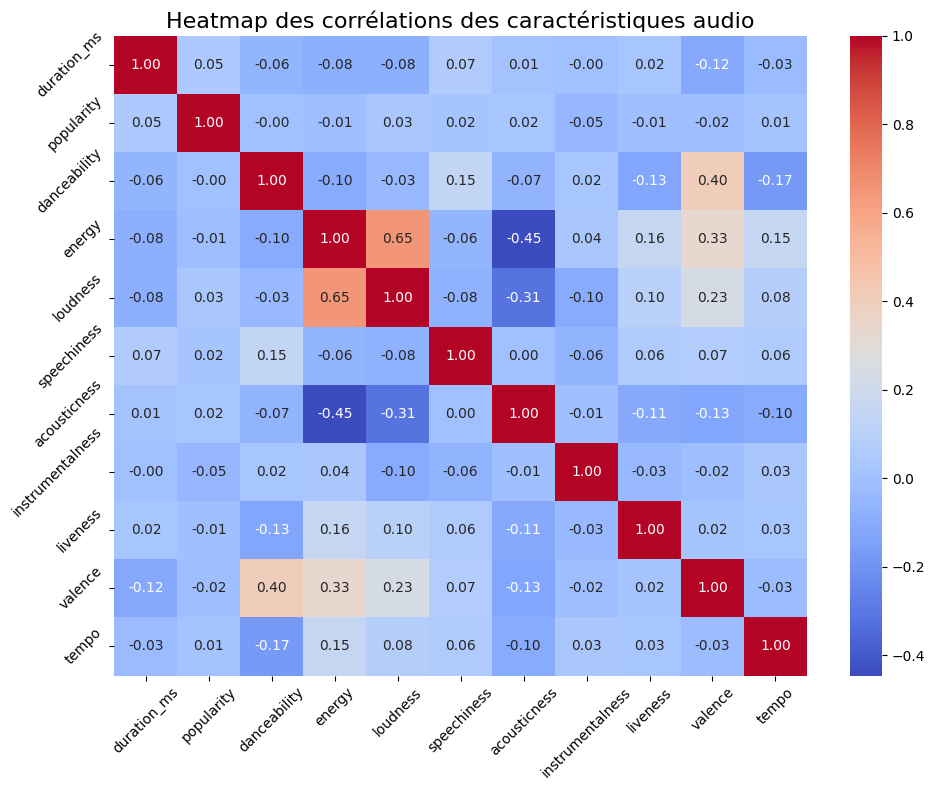

In [114]:
df_quantif = df[['duration_ms','popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
correlation_matrix = df_quantif.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Heatmap des corrélations des caractéristiques audio", fontsize=16)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Durée des chansons en fonction de l'année

Text(0.5, 0, 'Année')

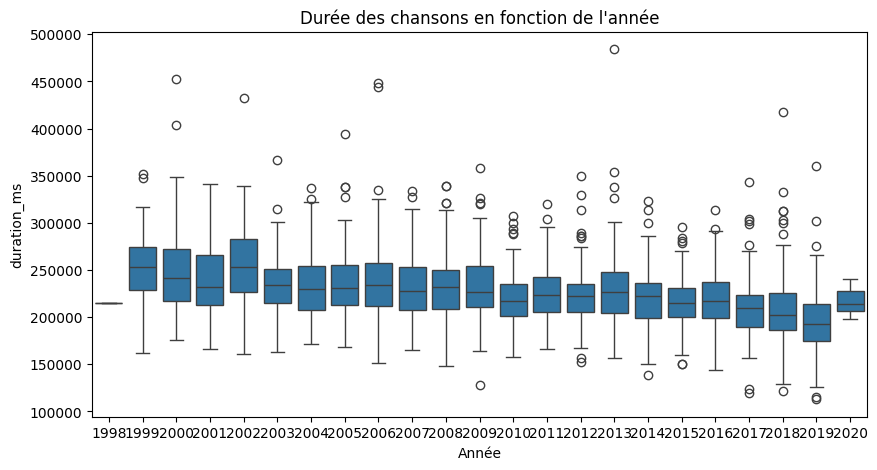

In [115]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='year', y='duration_ms', data=df)
plt.title('Durée des chansons en fonction de l\'année')
plt.xlabel('Année')


# Relation entre l'acousticité et la valence

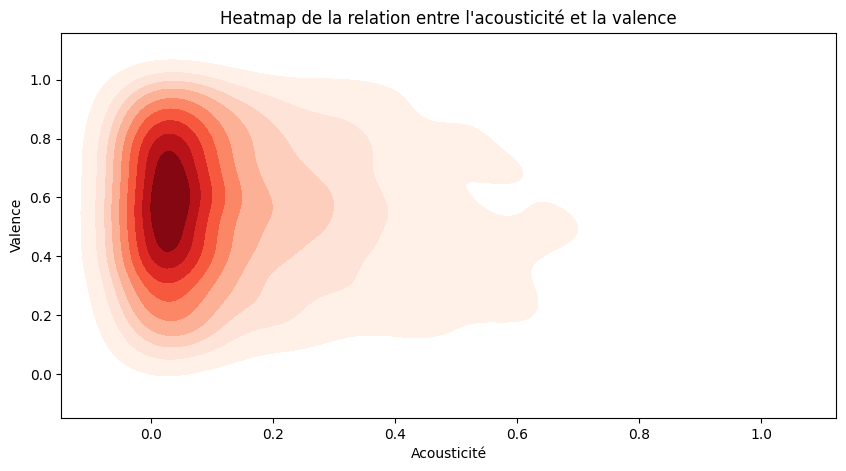

In [116]:
plt.figure(figsize=(10, 5))
sns.kdeplot(x='acousticness', y='valence', data=df, cmap="Reds", fill=True)
plt.title('Heatmap de la relation entre l\'acousticité et la valence')
plt.xlabel('Acousticité')
plt.ylabel('Valence')
plt.show()


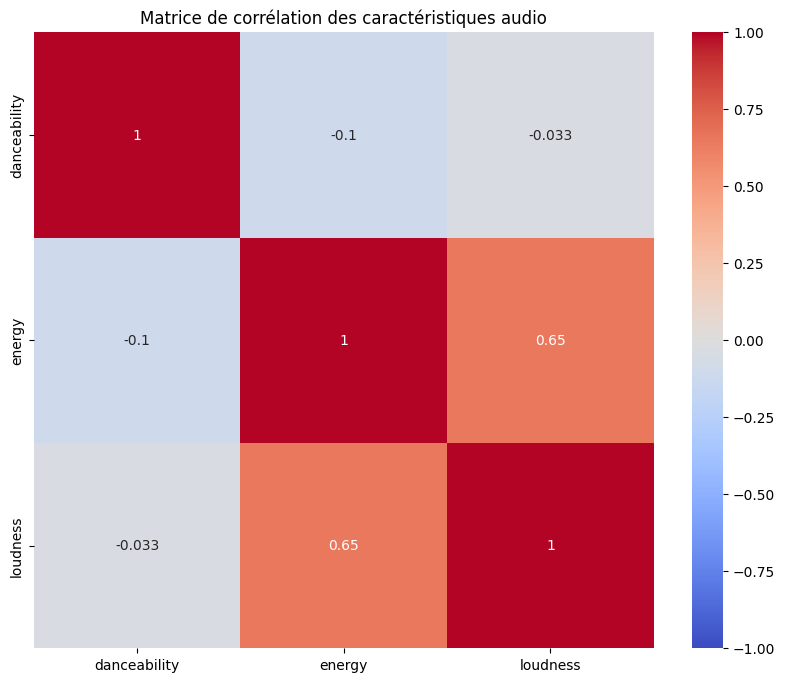

In [117]:

import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les caractéristiques audio
audio_features = ['danceability', 'energy', 'loudness']

# Calculer la matrice de corrélation
corr_matrix = df[audio_features].corr()

# Créer une heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation des caractéristiques audio')
plt.show()


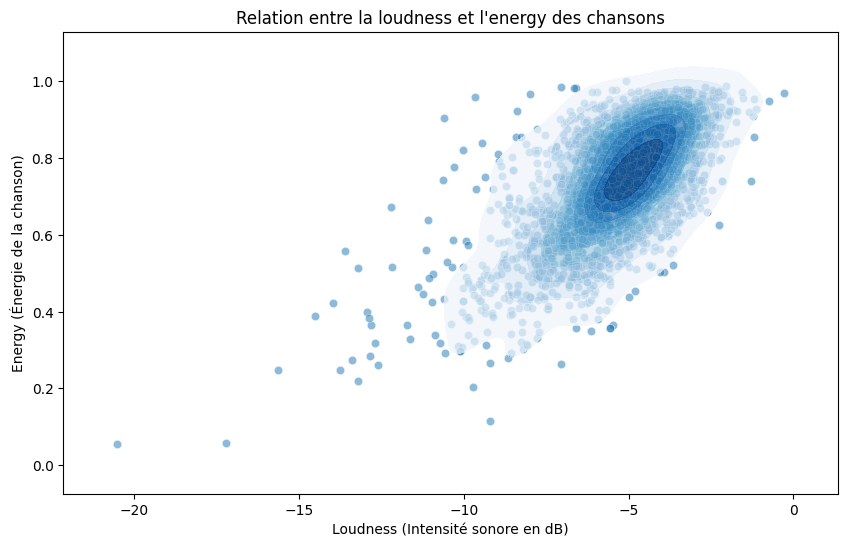

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer le scatter plot
sns.scatterplot(x='loudness', y='energy', data=df, alpha=0.5)

# Ajouter un KDE plot pour montrer la densité
sns.kdeplot(x='loudness', y='energy', data=df, cmap="Blues", fill=True, alpha=0.7)

# Ajouter un titre et des légendes d'axes
plt.title('Relation entre la loudness et l\'energy des chansons')
plt.xlabel('Loudness (Intensité sonore en dB)')
plt.ylabel('Energy (Énergie de la chanson)')

# Afficher le graphique
plt.show()


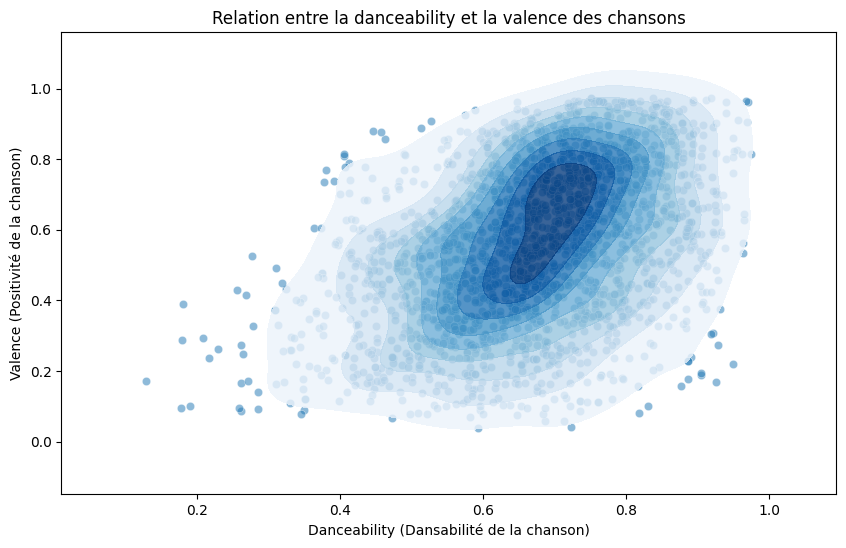

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer le scatter plot
sns.scatterplot(x='danceability', y='valence', data=df, alpha=0.5)

# Ajouter un KDE plot pour montrer la densité
sns.kdeplot(x='danceability', y='valence', data=df, cmap="Blues", fill=True, alpha=0.8)

# Ajouter un titre et des légendes d'axes
plt.title('Relation entre la danceability et la valence des chansons')
plt.xlabel('Danceability (Dansabilité de la chanson)')
plt.ylabel('Valence (Positivité de la chanson)')

# Afficher le graphique
plt.show()


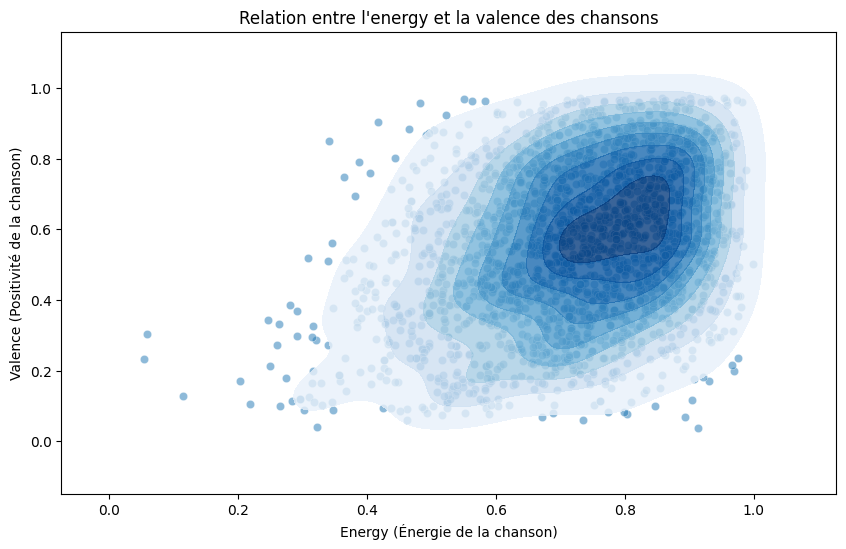

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer le scatter plot
sns.scatterplot(x='energy', y='valence', data=df, alpha=0.5)

# Ajouter un KDE plot pour montrer la densité
sns.kdeplot(x='energy', y='valence', data=df, cmap="Blues", fill=True, alpha=0.8)

# Ajouter un titre et des légendes d'axes
plt.title('Relation entre l\'energy et la valence des chansons')
plt.xlabel('Energy (Énergie de la chanson)')
plt.ylabel('Valence (Positivité de la chanson)')

# Afficher le graphique
plt.show()


# Prétraitement sur les genres 

In [121]:
print(df['genre'].unique())

['pop' 'rock, pop' 'pop, country' 'rock, metal' 'hip hop, pop, R&B'
 'hip hop' 'pop, rock' 'pop, R&B' 'Dance/Electronic'
 'pop, Dance/Electronic' 'rock, Folk/Acoustic, easy listening' 'metal'
 'hip hop, pop' 'R&B' 'pop, latin' 'Folk/Acoustic, rock'
 'pop, easy listening, Dance/Electronic' 'rock' 'rock, blues, latin'
 'pop, rock, metal' 'rock, pop, metal' 'hip hop, R&B' 'pop, Folk/Acoustic'
 'set()' 'hip hop, pop, latin' 'hip hop, Dance/Electronic'
 'hip hop, pop, rock' 'World/Traditional, Folk/Acoustic'
 'Folk/Acoustic, pop' 'rock, easy listening' 'World/Traditional, hip hop'
 'hip hop, pop, R&B, latin' 'rock, blues' 'rock, R&B, Folk/Acoustic, pop'
 'latin' 'pop, R&B, Dance/Electronic' 'World/Traditional, rock'
 'pop, rock, Dance/Electronic' 'pop, easy listening, jazz'
 'rock, Dance/Electronic' 'World/Traditional, pop, Folk/Acoustic'
 'country' 'hip hop, pop, Dance/Electronic' 'hip hop, pop, country'
 'World/Traditional, rock, pop' 'World/Traditional, pop'
 'hip hop, pop, R&B, Dance/El

In [122]:
import pandas as pd

# Supposons que votre DataFrame s'appelle df

# Convertir les genres en minuscules et supprimer les espaces supplémentaires
df['genre'] = df['genre'].str.lower().str.strip()

# Remplacer les genres vides par "unknown"
df['genre'] = df['genre'].replace('set()', 'unknown')

# Décomposer les genres multiples en genres individuels
df['genre'] = df['genre'].str.split(', ')

# Exploser les listes de genres en colonnes séparées
df_exploded = df.explode('genre')

# Afficher les genres uniques
unique_genres = df_exploded['genre'].unique()
print(unique_genres)


['pop' 'rock' 'country' 'metal' 'hip hop' 'r&b' 'dance/electronic'
 'folk/acoustic' 'easy listening' 'latin' 'blues' 'unknown'
 'world/traditional' 'jazz' 'classical']


/var/folders/ty/3v1d4nl53vdg6ty71y_vrl680000gn/T/ipykernel_41172/72433479.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='genre', data=genre_counts, palette='viridis')


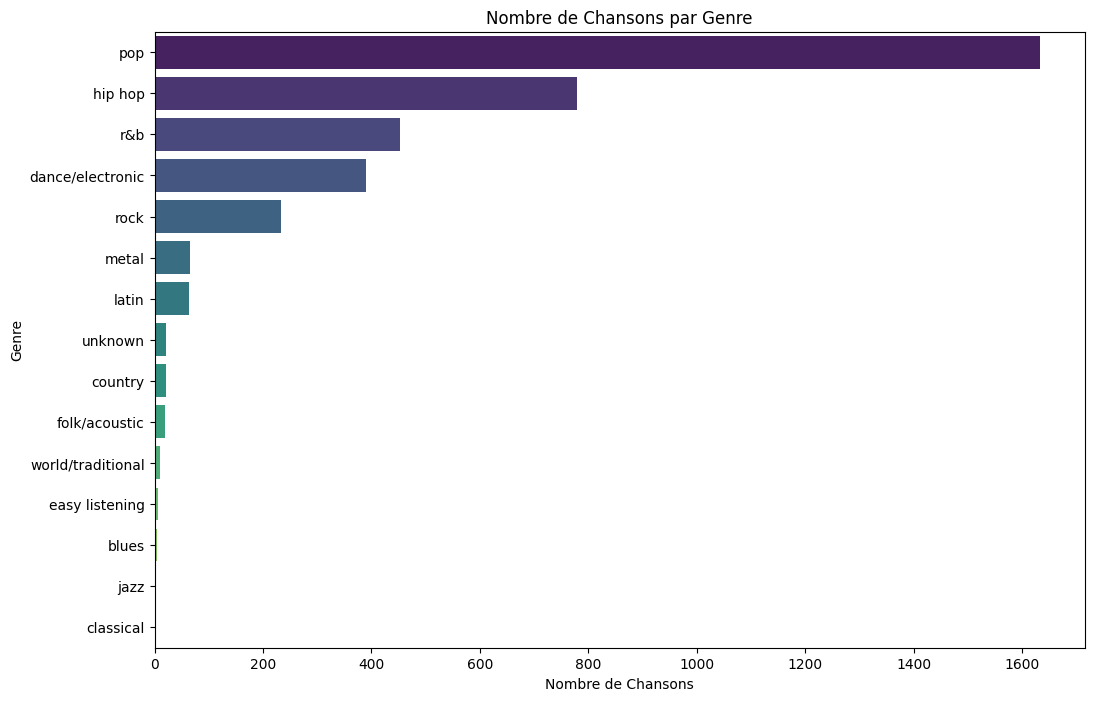

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer le nombre de chansons par genre
genre_counts = df_exploded['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Tracer le bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='genre', data=genre_counts, palette='viridis')
plt.title('Nombre de Chansons par Genre')
plt.xlabel('Nombre de Chansons')
plt.ylabel('Genre')
plt.show()


# Le Genre le plus à la mode par année 

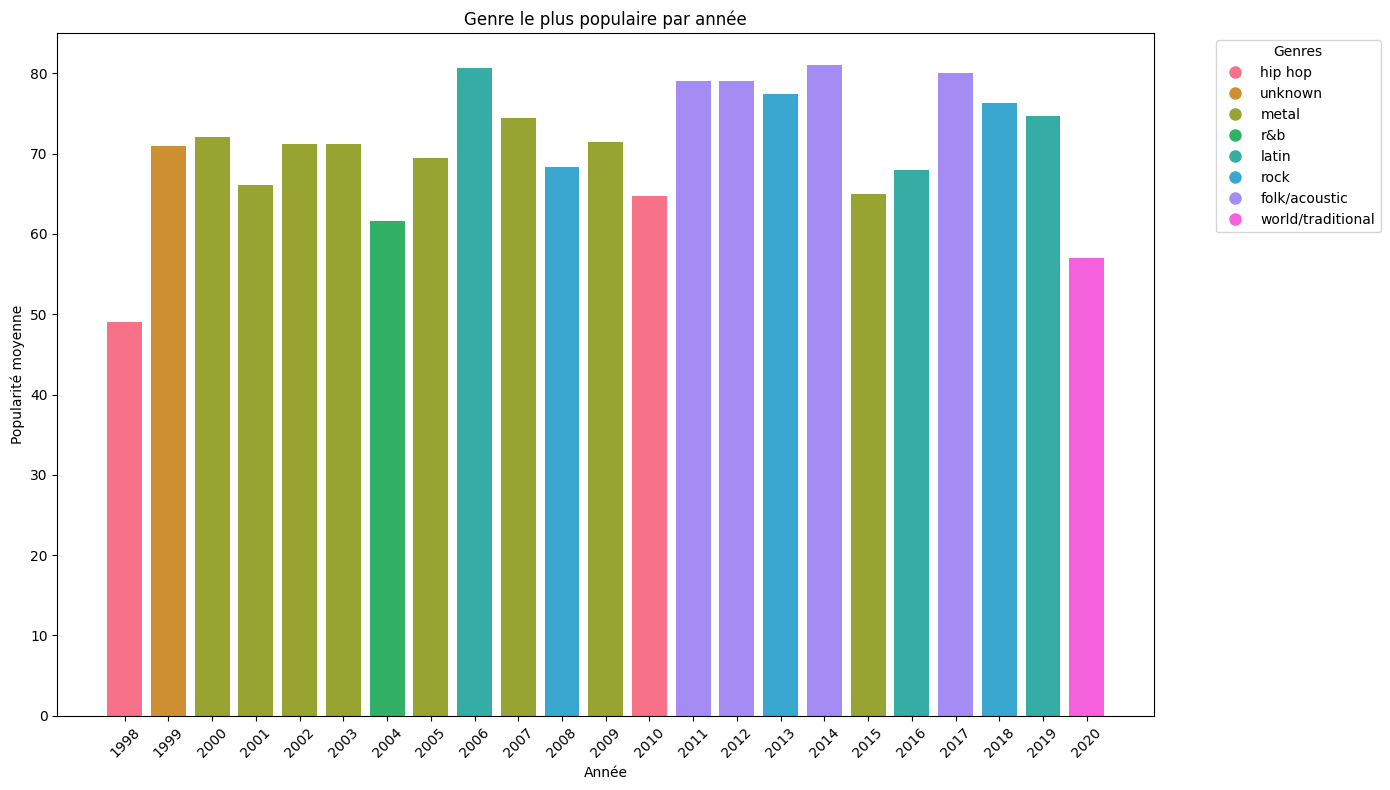

In [124]:
# Calcul de la popularité moyenne par genre et année
popularity_by_genre_year = df_exploded.groupby(['year', 'genre'])['popularity'].mean().reset_index()

# Sélection du genre le plus populaire par année
top_genre_per_year = popularity_by_genre_year.loc[
    popularity_by_genre_year.groupby('year')['popularity'].idxmax()
]
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une palette de couleurs pour les genres
palette = sns.color_palette("husl", n_colors=len(top_genre_per_year['genre'].unique()))
color_dict = dict(zip(top_genre_per_year['genre'].unique(), palette))

# Ajouter une colonne de couleurs au DataFrame
top_genre_per_year['color'] = top_genre_per_year['genre'].map(color_dict)

# Visualisation
plt.figure(figsize=(14, 8))
bars = plt.bar(top_genre_per_year['year'].astype(str), top_genre_per_year['popularity'], color=top_genre_per_year['color'])

# Ajouter une légende personnalisée
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[genre], markersize=10) for genre in color_dict]
plt.legend(handles, color_dict.keys(), title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Genre le plus populaire par année")
plt.xlabel("Année")
plt.ylabel("Popularité moyenne")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


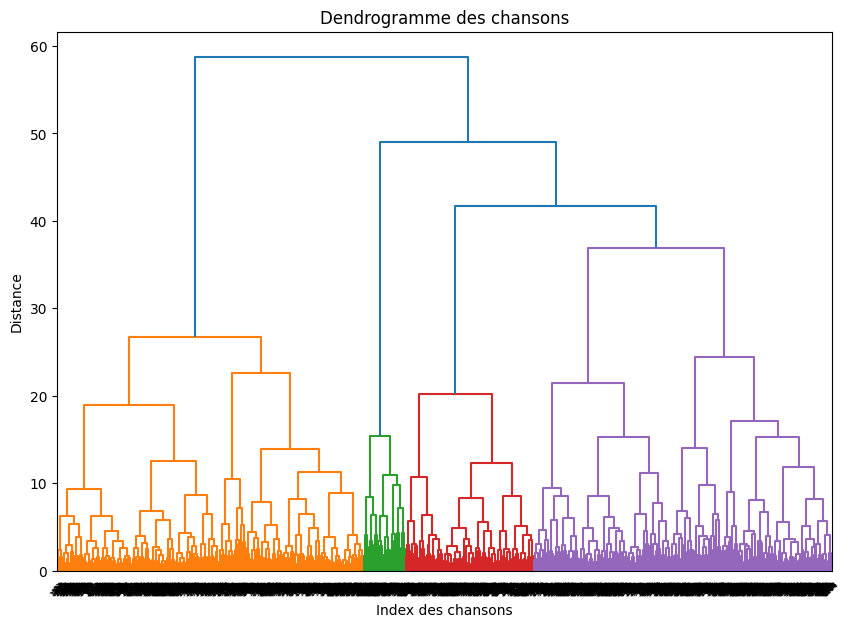

        tempo  energy  acousticness  danceability  valence  context
0      95.053   0.834        0.3000         0.751    0.894  Détente
1     148.726   0.897        0.0103         0.434    0.684    Sport
2     136.859   0.496        0.1730         0.529    0.278    Sport
3     119.992   0.913        0.0263         0.551    0.544    Sport
4     172.656   0.928        0.0408         0.614    0.879  Détente
...       ...     ...           ...           ...      ...      ...
1995  137.958   0.734        0.0427         0.842    0.952  Détente
1996  169.994   0.702        0.1170         0.552    0.564    Sport
1997   97.984   0.678        0.0669         0.847    0.811  Détente
1998  102.998   0.520        0.4500         0.741    0.347    Fêtes
1999  120.042   0.762        0.1920         0.695    0.553    Sport

[2000 rows x 6 columns]


In [125]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram

# Étape 1 : Standardisation des données
features = ['tempo', 'energy', 'acousticness', 'danceability', 'valence']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Étape 2 : Classification ascendante hiérarchique (CAH)
linkage_matrix = linkage(X_scaled, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(10, 7))
plt.title("Dendrogramme des chansons")
plt.xlabel("Index des chansons")
plt.ylabel("Distance")
dendrogram(linkage_matrix, leaf_rotation=45, labels=df.index)
plt.show()

# Étape 3 : Créer des clusters (on choisit 3 clusters pour Sport, Détente, Fêtes)
df['cluster'] = fcluster(linkage_matrix, 3, criterion='maxclust')

# Étape 4 : Mapper les clusters aux catégories de contexte
# La correspondance des clusters peut nécessiter des ajustements en fonction des données réelles
context_map = {
    1: 'Détente',  # Exemple : Faible énergie, acoustique élevée
    2: 'Fêtes',    # Exemple : Dansant, valence positive
    3: 'Sport'     # Exemple : Énergie élevée, tempo rapide
}
df['context'] = df['cluster'].map(context_map)

# Résultat final
print(df[['tempo', 'energy', 'acousticness', 'danceability', 'valence', 'context']])

In [126]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,cluster,context
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,[pop],1,Détente
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"[rock, pop]",3,Sport
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"[pop, country]",3,Sport
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"[rock, metal]",3,Sport
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,[pop],1,Détente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,[pop],1,Détente
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,[pop],3,Sport
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"[hip hop, country]",1,Détente
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,[pop],2,Fêtes


/var/folders/ty/3v1d4nl53vdg6ty71y_vrl680000gn/T/ipykernel_41172/3601425868.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='context', palette='husl')


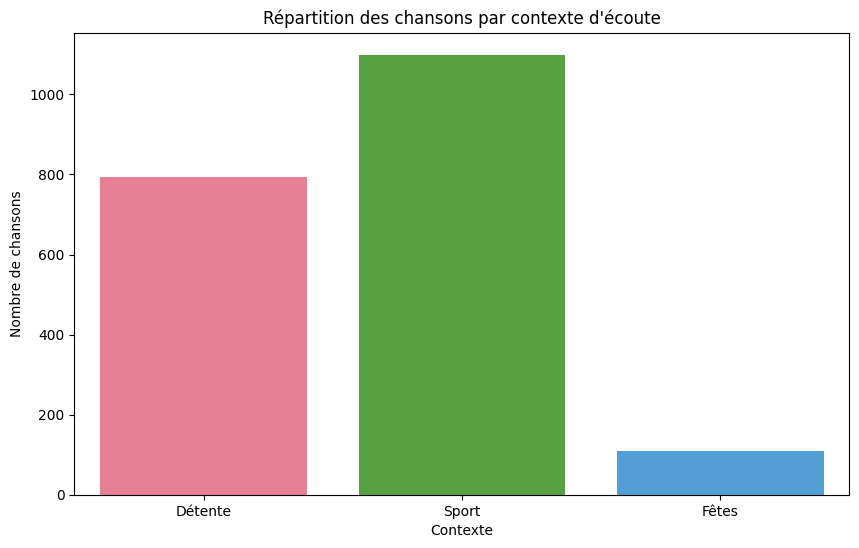

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='context', palette='husl')
plt.title("Répartition des chansons par contexte d'écoute")
plt.xlabel("Contexte")
plt.ylabel("Nombre de chansons")
plt.show()


/var/folders/ty/3v1d4nl53vdg6ty71y_vrl680000gn/T/ipykernel_41172/1800989049.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popularity_by_context, x='context', y='popularity', palette='viridis')


Text(0.5, 0, 'Contexte')

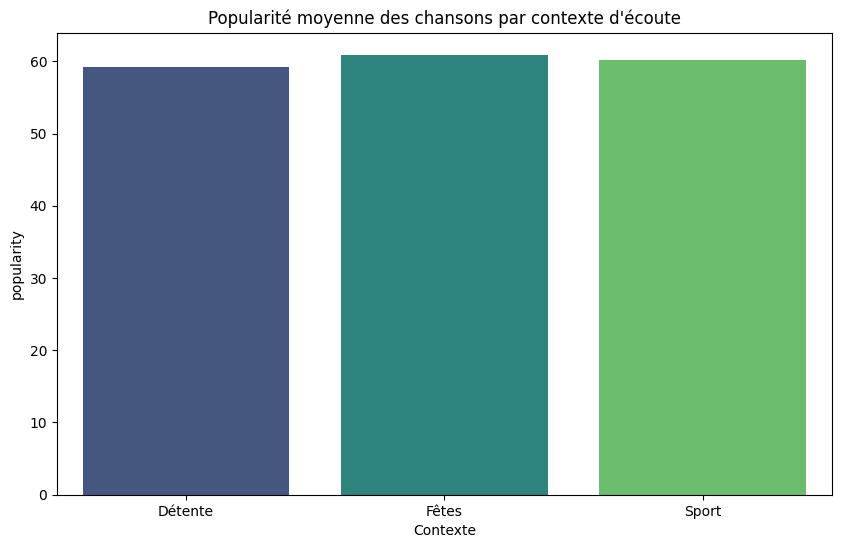

In [128]:
# Popularité  par Contexte
popularity_by_context = df.groupby('context')['popularity'].mean().reset_index()
# TRace
plt.figure(figsize=(10, 6))
sns.barplot(data=popularity_by_context, x='context', y='popularity', palette='viridis')
plt.title("Popularité moyenne des chansons par contexte d'écoute")
plt.xlabel("Contexte")



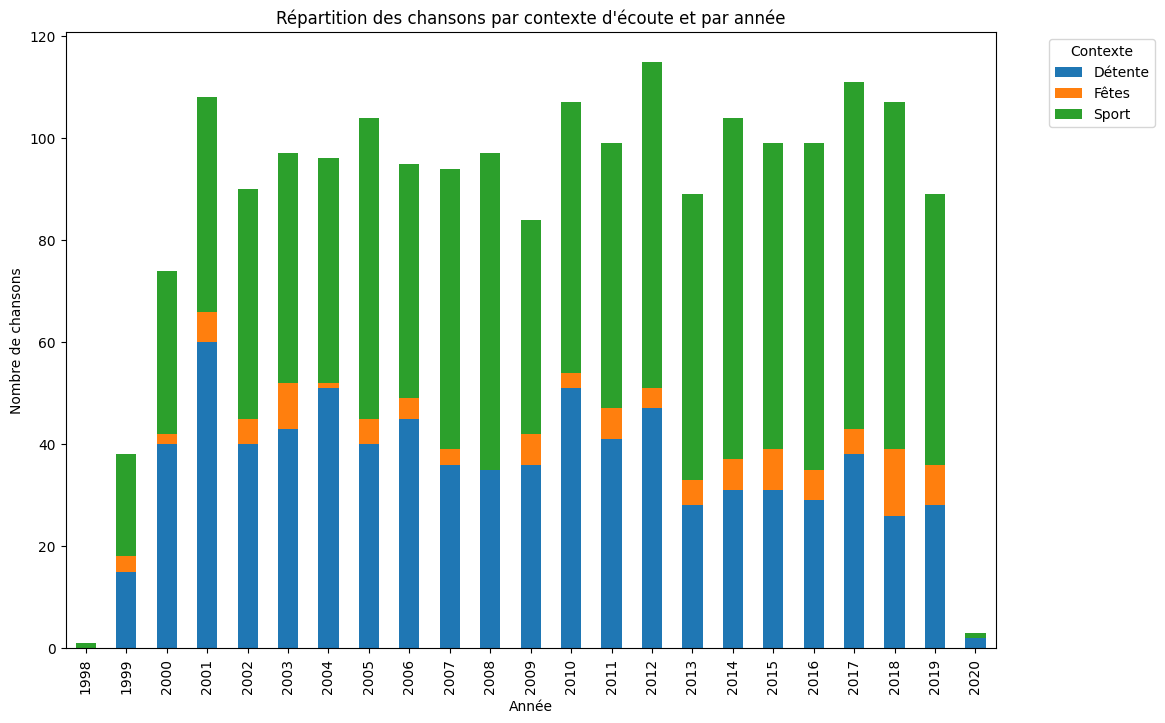

In [129]:
# Context par année 
context_by_year = df.groupby(['year', 'context']).size().unstack()
# Plot
context_by_year.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Répartition des chansons par contexte d'écoute et par année")
plt.xlabel("Année")
plt.ylabel("Nombre de chansons")
plt.legend(title='Contexte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [130]:
df


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,cluster,context
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,[pop],1,Détente
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"[rock, pop]",3,Sport
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"[pop, country]",3,Sport
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"[rock, metal]",3,Sport
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,[pop],1,Détente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,[pop],1,Détente
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,[pop],3,Sport
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"[hip hop, country]",1,Détente
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,[pop],2,Fêtes


In [131]:
# Créer une colonne 'rank' qui classe les chansons par popularité dans chaque année
df['rank'] = df.groupby('year')['popularity'].rank(ascending=False, method='dense').astype(int)

In [132]:
df['genre'] = df['genre'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,cluster,context,rank
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,1,Détente,5
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock,3,Sport,2
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop,3,Sport,10
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock,3,Sport,4
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,1,Détente,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,...,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,1,Détente,6
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,...,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,3,Sport,7
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,...,0.1090,0.0669,0.000000,0.2740,0.811,97.984,hip hop,1,Détente,16
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,...,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,2,Fêtes,10


In [133]:
df['mode'] = df['mode'].apply(lambda x: 'minor' if x == 0 else 'major')

In [134]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import time

# Vos identifiants Spotify
CLIENT_ID = 'df64419d2cb7446090966ca2273da732'
CLIENT_SECRET = 'ba437c1ec0fc4b4a801836a61a9a8f77'

# Authentification avec l'API de Spotify
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


# Fonction pour obtenir l'URL de la couverture de l'album
def get_album_cover_url(artist, song):
    try:
        query = f'artist:{artist} track:{song}'
        results = sp.search(q=query, type='track', limit=1)
        
        # Vérifier si des résultats ont été trouvés
        if results['tracks']['items']:
            album_id = results['tracks']['items'][0]['album']['id']
            album = sp.album(album_id)
            return album['images'][0]['url']  # URL de la plus grande image
        else:
            return 'Aucune image trouvée'
    except Exception as e:
        print(f"Erreur lors de la récupération pour {artist} - {song}: {e}")
        return 'Erreur'

# Ajouter la colonne des URLs de couverture d'album
def add_album_cover_urls(df):
    album_urls = []
    for index, row in df.iterrows():
        url = get_album_cover_url(row['artist'], row['song'])
        album_urls.append(url)
        time.sleep(1)  # Attente d'une seconde pour ne pas dépasser la limite de requêtes
    df['URL_Couverture_Album'] = album_urls

# Appliquer la fonction pour ajouter les URLs de couverture
add_album_cover_urls(df)

# Afficher le DataFrame mis à jour
pd.set_option('display.max_colwidth', None)  # Afficher les URLs complètes
print(df)


Erreur lors de la récupération pour Pedro Capó - Calma - Remix: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)
              artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1

In [135]:
df.to_csv('spotify.csv', index=False, encoding='utf-8')